In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin = url, extract = True)

68606236/68606236 [==============================] - 1s 0us/step


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch = 100
img_shape = 150

In [ ]:
def plotimages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
image_gen = ImageDataGenerator(rescale = 1. / 255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = batch,
                                                directory = train_dir,
                                                shuffle = True,
                                                target_size = (img_shape, img_shape))

Found 2000 images belonging to 2 classes.


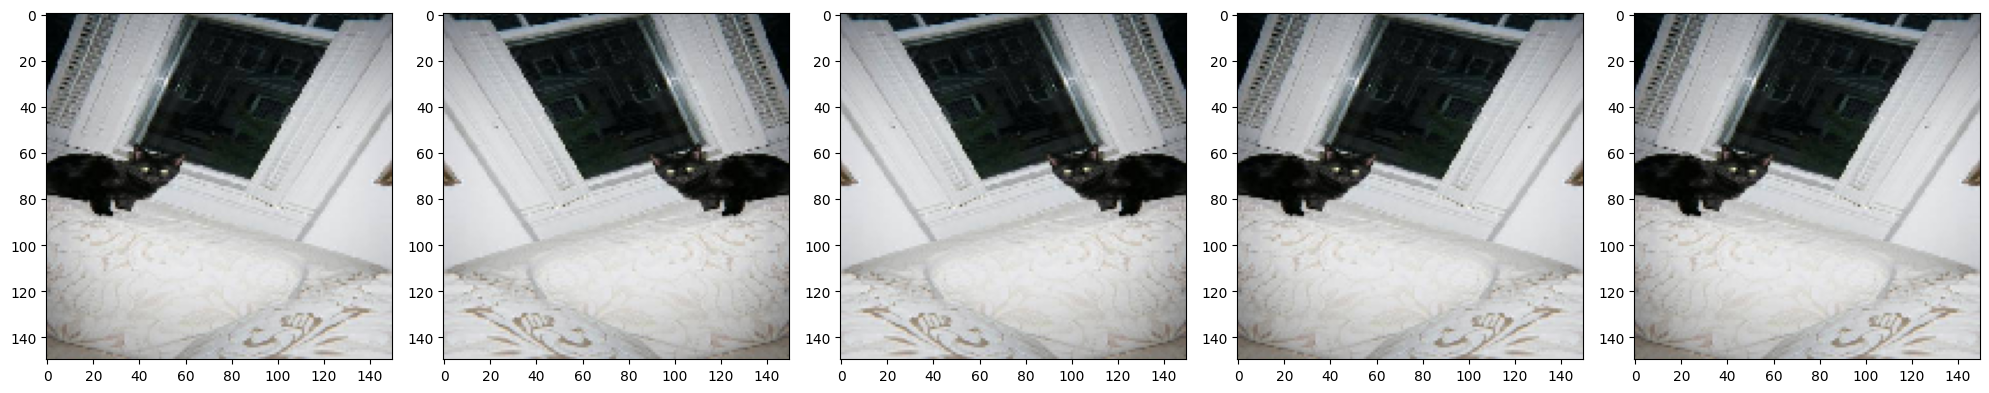

In [ ]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]
plotimages(aug_images)

In [ ]:
image_gen = ImageDataGenerator(rescale = 1. /255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = batch,
                                             directory = train_dir,
                                             shuffle = True,
                                             target_size = (img_shape, img_shape))

Found 2000 images belonging to 2 classes.


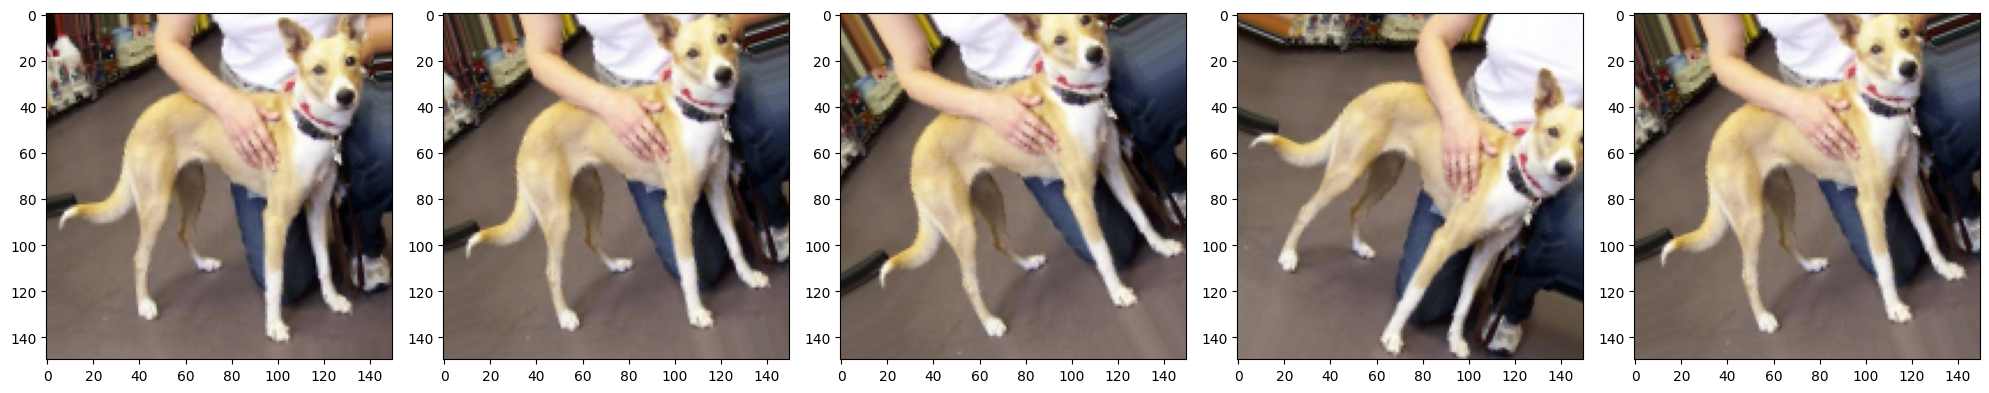

In [ ]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

plotimages(aug_images)

In [ ]:
image_gen = ImageDataGenerator(rescale = 1. /255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = batch,
                                             directory = train_dir,
                                             shuffle = True,
                                             target_size = (img_shape, img_shape))

Found 2000 images belonging to 2 classes.


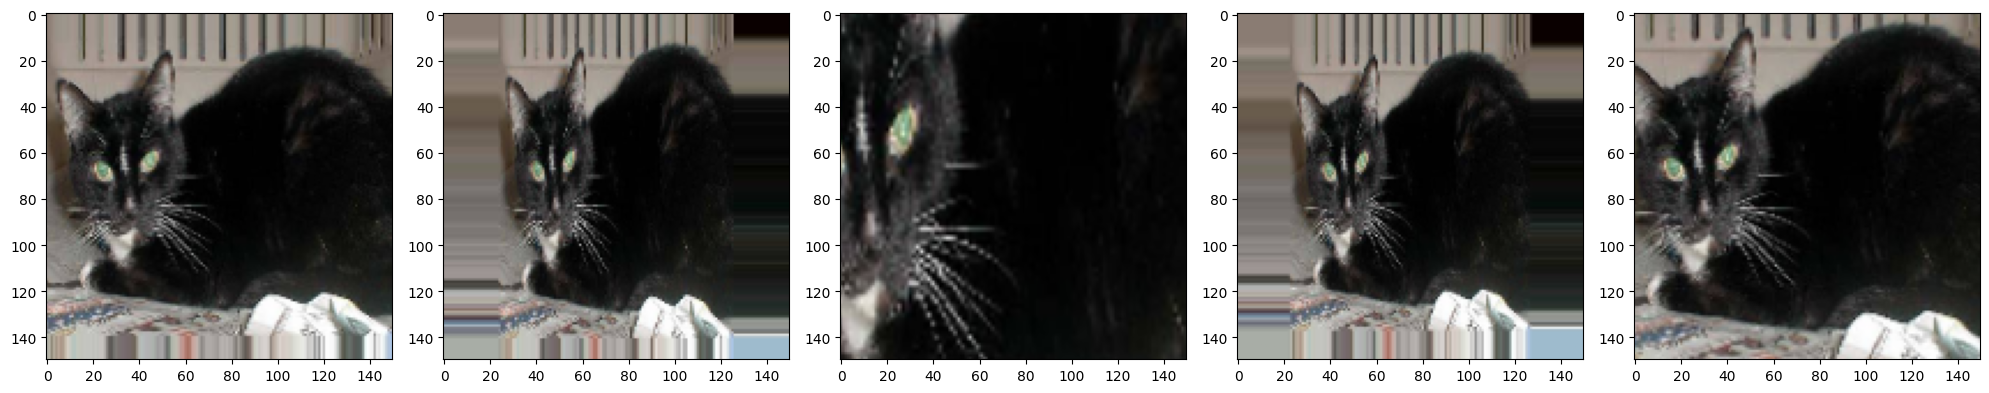

In [ ]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

plotimages(aug_images)

In [ ]:
image_gen_train = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch,
                                                     directory = train_dir,
                                                     shuffle = True,
                                                     target_size = (img_shape, img_shape),
                                                     class_mode = 'binary')

Found 2000 images belonging to 2 classes.


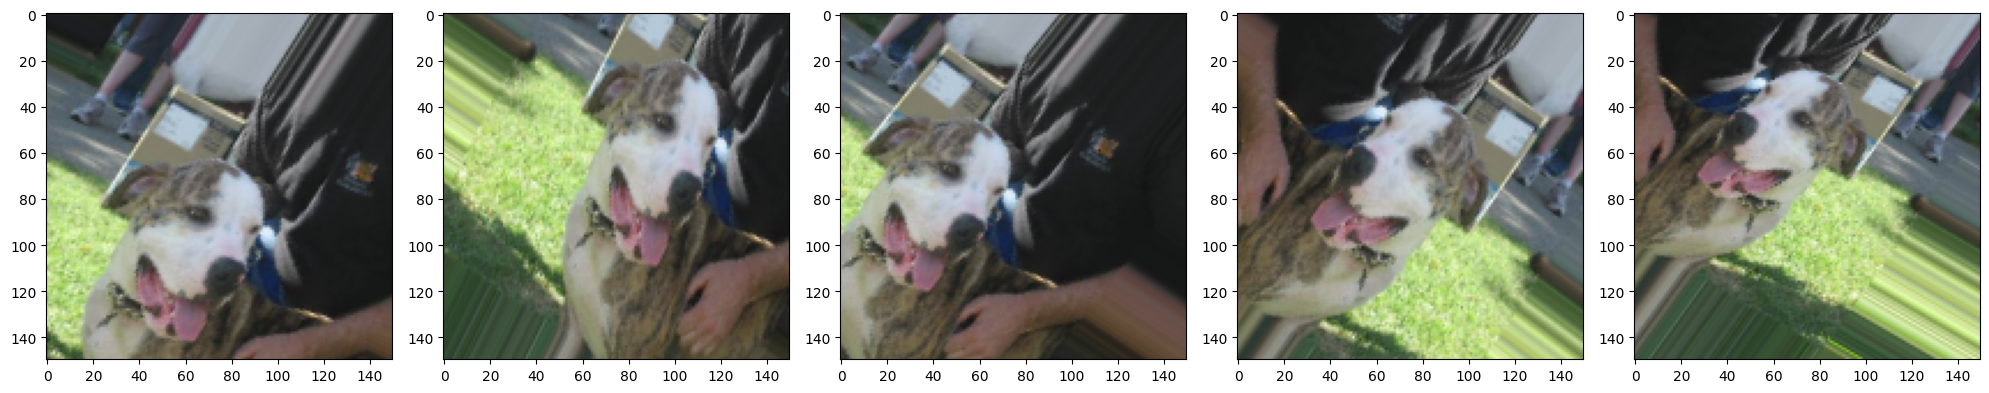

In [ ]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

plotimages(aug_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale = 1. / 255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = batch,
                                                 directory = validation_dir,
                                                 target_size = (img_shape, img_shape),
                                                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
epochs=10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch)))
)

<ipython-input-44-c2fe2e7e1d73>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 166s 8s/step - loss: 0.7113 - accuracy: 0.5115 - val_loss: 0.6928 - val_accuracy: 0.4980
Epoch 2/10
20/20 [==============================] - 169s 8s/step - loss: 0.6935 - accuracy: 0.4950 - val_loss: 0.6925 - val_accuracy: 0.5010
Epoch 3/10
20/20 [==============================] - 135s 7s/step - loss: 0.6914 - accuracy: 0.5375 - val_loss: 0.6800 - val_accuracy: 0.6150
Epoch 4/10
20/20 [==============================] - 136s 7s/step - loss: 0.6844 - accuracy: 0.5490 - val_loss: 0.6576 - val_accuracy: 0.6370
Epoch 5/10
20/20 [==============================] - 137s 7s/step - loss: 0.6846 - accuracy: 0.5690 - val_loss: 0.6669 - val_accuracy: 0.6340
Epoch 6/10
20/20 [==============================] - 131s 6s/step - loss: 0.6710 - accuracy: 0.5880 - val_loss: 0.6705 - val_accuracy: 0.5550
Epoch 7/10
20/20 [==============================] - 134s 7s/step - loss: 0.6806 - accuracy: 0.5480 - val_loss: 0.6620 - val_accuracy: 0.5790
Epoch 8/10
20

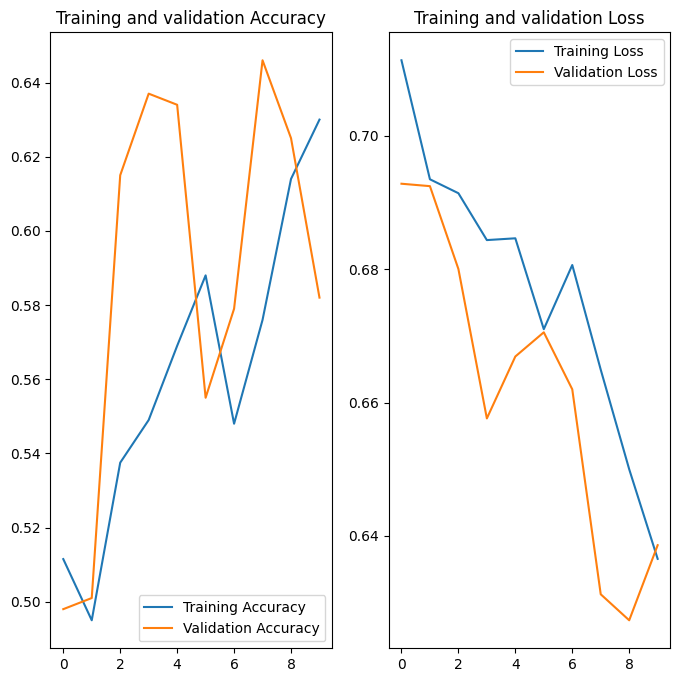

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation Loss')
plt.show()

In [ ]:

import tensorflow as tf
print(tf.__version__)



2.15.0
